<a href="https://colab.research.google.com/github/christophermassey2005/aidrawinggame/blob/main/GANv5_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1/1 [==============================] - 0s 102ms/step


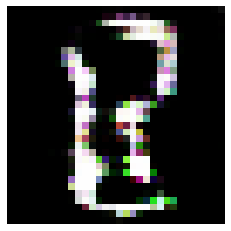

In [ ]:
from google.colab import drive
from keras.datasets.cifar10 import load_data
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.utils.vis_utils import plot_model
from numpy.random import randint
from numpy.random import rand
from numpy import zeros
from numpy import ones
from numpy import expand_dims
import numpy as np
from numpy.random import randn
from numpy.random import randint
from keras.models import load_model
from matplotlib import pyplot as plt
from PIL import Image

#drive.mount('/content/drive', force_remount=True)
#!unzip drive/MyDrive/finalitemsv2v1lost.zip

def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input


# Plot generated images
def show_plot(examples, n):
	for i in range(n * n):
		plt.subplot(n, n, 1 + i)
		plt.axis('off')
		plt.imshow(examples[i, :, :, :])
	plt.show()

# load model
model = load_model('wine glass.h5') #Model trained for 100 epochs
# generate images
latent_points = generate_latent_points(100, 1)  #Latent dim and n_samples
# generate images
X = model.predict(latent_points)
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0

import numpy as np
X = (X*255).astype(np.uint8)

# plot the result
show_plot(X, 1)

img = Image.fromarray(X[0], 'RGB')
img.save('wine glass.png')